In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Popularity.csv") 

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df.shape

(39644, 61)

In [7]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [13]:
df[" num_keywords"].mode()

0    7.0
Name:  num_keywords, dtype: float64

In [14]:
df[" shares"].mean()

3395.3801836343455

In [17]:
df[" shares"].median()

1400.0

In [23]:
df[" shares"].value_counts()

 shares
1100     2308
1200     2018
1300     1740
1400     1592
1500     1323
         ... 
96100       1
443         1
58100       1
360         1
45000       1
Name: count, Length: 1454, dtype: int64

In [26]:
df[" shares"].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [34]:
np.percentile(df[" shares"], 78)

3100.0

In [45]:
q1 = df[" shares"].quantile(0.25)
q3 = df[" shares"].quantile(0.75)
IQR = q3 - q1


df_1 = df[~(df[" shares"] > 10800) ]

In [46]:
df_1[" shares"].describe()

count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name:  shares, dtype: float64

In [47]:
df_1[" shares"].median()

1400.0

In [53]:
(df[" shares"].shape[0] - df_1[" shares"].shape[0])/df[" shares"].shape[0]*100

4.996973060236101

In [54]:
df_n = pd.read_csv("EDA_nas.csv")
df_n.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


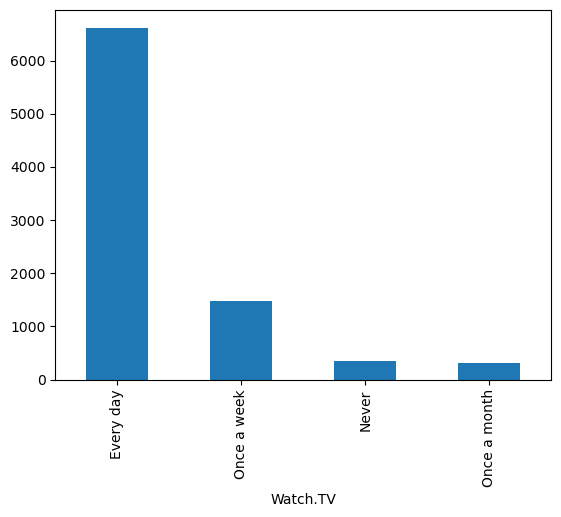

In [57]:
df_n["Watch.TV"].value_counts().plot.bar()
plt.show()

In [68]:
df_n.groupby("Watch.TV").count()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Solve.science.problems,Express.science.views,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
Watch.TV,,,,,,,,,,,,,,,,,,,,,
Every day,6621,6621,6621,6619,6453,6206,6449,6621,6272,6156,...,6444,6392,6621,6621,6621,6621,3125,3165,3113,3075
Never,348,348,348,348,340,312,336,348,319,319,...,302,299,348,348,348,348,172,182,163,163
Once a month,309,309,309,309,296,282,299,309,294,278,...,298,300,309,309,309,309,147,153,142,154
Once a week,1479,1479,1479,1479,1440,1397,1452,1479,1387,1357,...,1438,1439,1479,1479,1479,1479,725,710,703,707


In [66]:
df_n["Science.."].mean()

36.313272200772204